In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import (
    DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz)

%matplotlib inline

In [6]:
iris = load_iris()
X = iris.data[:, 2:] # petal len, petal wid
y = iris.target

In [13]:
df = pd.DataFrame(data=X)
df['y'] = y
df.head()

,0,1,y
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


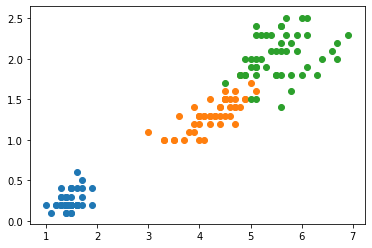

In [14]:
for sp in set(y):
    sub = df.loc[df.y == sp]
    plt.scatter(sub[0], sub[1], label=sp);

In [15]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
export_graphviz(tree_clf, 
                out_file='iris_tree.dot', 
                feature_names=iris.feature_names[2:], 
                class_names=iris.target_names, 
                rounded=True, 
                filled=True)

In [17]:
!dot -Tpng iris_tree.dot -o iris_tree.png

<img src="iris_tree.png" />

### Estimating Class Probabilities 

In [6]:
sample = [[5, 1.5]]
tree_clf.predict_proba(sample), tree_clf.predict(sample)

(array([[0.        , 0.90740741, 0.09259259]]), array([1]))

### Regression

In [16]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [17]:
export_graphviz(tree_reg, 
                out_file='iris_reg_tree.dot', 
                feature_names=iris.feature_names[2:], 
                class_names=iris.target_names, 
                rounded=True, 
                filled=True)

In [18]:
!dot -Tpng iris_reg_tree.dot -o iris_reg_tree.png

<img src="iris_reg_tree.png" />